In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Exploratory Data Analysis

In [3]:
df.shape

(20640, 10)

In [4]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [5]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


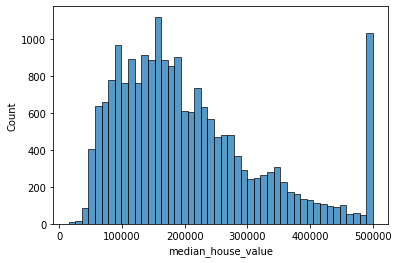

In [6]:
sns.histplot(df.median_house_value)
plt.show()

### Question 1. Find a feature with missing values. How many missing values does it have?

In [7]:
df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [8]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2: What's the median (50% percentile) for variable 'population'?  

In [9]:
df.population.median()

1166.0

In [10]:
np.median(df['population'])

1166.0

### Split Data

In [11]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(12384, 4128, 4128)

In [12]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [13]:
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
df_shuffled = df.iloc[idx]
df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [15]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [18]:

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
def prepare_X(df, fillna_value):
    df_num = df
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Question 3: Deal with missing values for the column from Q1. Which option gives better RMSE? Filling with zeroes or the mean of the variable?

####  Fill it with mean of this variable

In [22]:
mean = df_train.total_bedrooms.mean()
X_mean_train = prepare_X(df_train, fillna_value=mean)
w0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [23]:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w0_mean + X_mean_val.dot(w_mean)

In [24]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.33

####  Fill it with zeroes

In [25]:
zero = 0
X_null_train = prepare_X(df_train, fillna_value=zero)
w0_null, w_null = train_linear_regression(X_null_train, y_train)

In [26]:
X_null_val = prepare_X(df_val, fillna_value=zero)
y_null_pred_val = w0_null + X_null_val.dot(w_null)

In [27]:
np.round(rmse(y_val, y_null_pred_val),2)

0.33

### Question 4: Which r gives the best RMSE?

In [29]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [30]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    w0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w0 + X_null_val.dot(w)
    
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    print(r, w0, rmse_val)

0.0 -11.68697524180786 0.33
1e-06 -11.686959175857396 0.33
0.0001 -11.68536886525918 0.33
0.001 -11.670931318157475 0.33
0.01 -11.528493585707082 0.33
0.1 -10.274500281964324 0.33
1 -4.920480897816341 0.33
5 -1.4820957455970414 0.34
10 -0.7899311832024091 0.34


### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [31]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w0, rmse_val)

0 -11.900382137907938 0.34
1 -11.732757373187942 0.34
2 -11.806729360909355 0.33
3 -11.587900347906055 0.34
4 -11.38947058813445 0.34
5 -11.447114275472801 0.34
6 -11.370516351448881 0.35
7 -12.473448919176835 0.34
8 -11.8002874299635 0.35
9 -11.45904683079377 0.34


In [32]:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [33]:
np.round(np.std(rmse_list),3)

0.005

### Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [34]:
idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]

df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [35]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35